<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/An%C3%A1lise_de_departamento_de_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 📂 Projeto | Data Science | By Sarah Faria Rezende </sub>

---


# **Análise de Departamento de Recursos Humanos** 💼📊

É amplamente reconhecido que a retenção de talentos e o enfrentamento de demissões inesperadas são desafios enfrentados por empresas de todos os setores. A redistribuição de tarefas de um funcionário que se desliga pode acarretar em atrasos e/ou queda na qualidade do serviço, resultando em contratempos que repercutem no produto final ou no relacionamento com o cliente. Diante disso, surge a possibilidade de utilizar dados para identificar quais colaboradores apresentam maior probabilidade de deixar a organização.

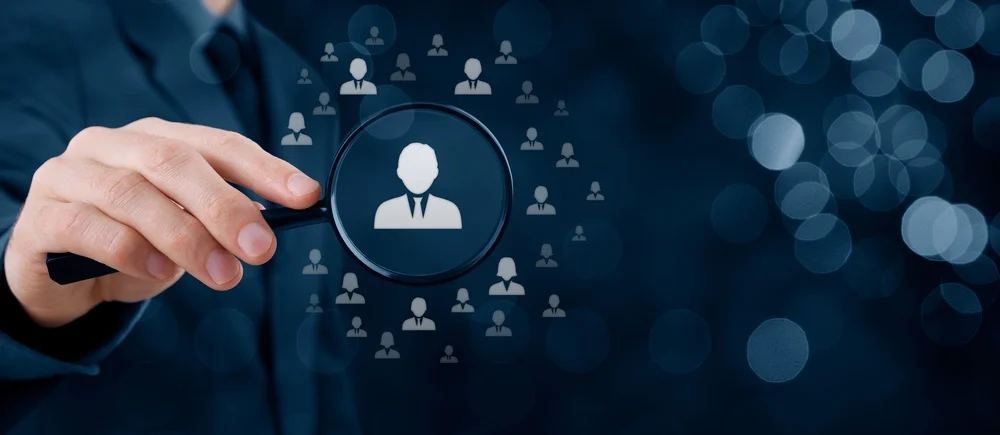

# 📍 Objetivo

Este estudo tem como objetivo identificar potenciais elementos que influenciam os pedidos de demissão dos colaboradores. Ele visa também aplicar modelos de machine learning ao conjunto de dados para prever quais funcionários estão mais propensos a sair da empresa e avaliar a eficácia desses modelos com base em métricas como precisão, recall e pontuação.

### Etapas:

1. Introdução ao Problema
2. Dicionário de Variáveis
3. Importação de Bibliotecas e Conjunto de Dados
4. Visualização dos Dados
5. Pré-processamento e Divisão em Conjuntos de Treinamento/Teste
6. Aplicação de Modelos de Aprendizado de Máquina
7. Considerações Finais


# 1. **Introdução ao Problema**

De acordo com um relatório do [G1](https://https//g1.globo.com/trabalho-e-carreira/noticia/2022/06/30/pais-bate-recorde-de-pedidos-de-demissao-em-12-meses-mostra-levantamento.ghtml), entre junho de **2021** e maio de **2022**, o Brasil testemunhou aproximadamente **6,175** milhões de pedidos de demissão, equivalendo a cerca de **33%** de todos os desligamentos no país.

Um estudo intitulado ["There Are Significant Business Costs to Replacing Employees"](https://www.americanprogress.org/wp-content/uploads/2015/08/CostofTurnover0815.pdf) ressalta que os custos decorrentes de uma demissão, independentemente da sua natureza, podem representar, em média, **16%** do salário anual do colaborador. Para cargos que demandam conhecimentos especializados e anos de experiência, esse custo pode chegar a até **213%** do salário anual. O estudo também conclui que os principais fatores para a retenção de funcionários incluem benefícios familiares que proporcionam flexibilidade para lidar com questões familiares e uma ambiente de trabalho que oferece adaptabilidade.

Além disso, a substituição de funcionários acarreta não apenas em custos diretos relacionados ao processo de contratação, mas também na perda de produtividade durante o período de adaptação do novo colaborador. Nesse contexto, este estudo tem como objetivo identificar indivíduos com maior probabilidade de deixar a empresa, possibilitando a adoção de medidas que incentivem esses funcionários a optarem por permanecer em seus cargos.

# Dicionário de Variáveis

* `Age`: Idade dos funcionários;
* `Attrition`: Indica os funcionários que já saíram da empresa;
* `BusinessTravel`: Frequência de viagem do funcionário;
* `DailyRate`: Salário diário;
* `Department`: Departamento do funcionário;
* `DistanceFromHome`: Distância entre a casa do funcionário e a empresa;
* `Education`: Escolaridade do funcionário;
* `EducationField`: Área do conhecimento do funcionário;
* `EmploymentCount`: Contador de funcionários;
* `EmployeeNumber`: Número de matrícula do funcionário;
* `EnvironmentSatisfaction`: Grau de satisfação do funcionário com o ambiente;
* `Gender`: Gênero do funcionário;
* `HourlyRate`: Horas trabalhadas;
* `JobInvolvement`: Grau de identificação com o trabalho;
* `JobLevel`: Nível do cargo;
* `JobRole`: Cargo do funcionário;
* `JobSatisfaction`: Nível de satisfação com o trabalho;
* `MaritalStatus`: Estado civil;
* `MonthlyIncome`: Remuneração mensal;
* `MonthlyRate`: Taxa Mensal;
* `NumCompaniesWorked`: Número de empresas em que já trabalhou;
* `Over18`: Funcionário com mais de 18 anos;
* `OverTime`: Hora extra;
* `PercentSalaryHike`: Percentual de aumento de salário;
* `PerformanceRating`: Desempenho do funcionário;
* `RelationshipSatisfaction`: Satisfação com as relações dentro do trabalho;
* `StandardHours`: Horas de trabalho padrão;
* `StockOptionLevel`: Se o funcionário tem ações da empresa;
* `TotalWorkingYears`: Quantos anos o funcionário trabalha na empresa;
* `TrainingTimesLastYear`: Tempo gasto em treinamentos com o funcionário;
* `WorkLifeBalance`: Balanceamento entre as atividades de trabalho e pessoais;
* `YearsAtCompany`: Anos de trabalho na companhia;
* `YearsInCurrentRole`: Anos seguidos de trabalho na companhia;
* `YearsSinceLastPromotion`: Anos desde a última promoção;
* `YearsWithCurrManager`: Quantos anos de trabalho com o atual gerente;

# 3. Importação de Bibliotecas e Conjunto de Dados


### Cojunto de Dados

Os dados foram adquiridas de um *dataset* disponibilizado no [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np
import folium

%matplotlib inline
# tamanho do gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12

In [6]:
# importar o arquivo
df = pd.read_csv("/content/data-rh.csv")

In [9]:
# quantidade de linhas e colunas do DataFrame
df.shape

(1470, 35)

In [7]:
# verificar as 5 primeiras entradas do dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
# Busca por informações ausentes no DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



# 4. Visualização dos Dados


# 5. Pré-processamento e Divisão em Conjuntos de Treinamento/Teste


# 6. Aplicação de Modelos de Aprendizado de Máquina


# 7. Considerações Finais